# Group 4 - Alka Badhan, Grant Thompson, Nabeel Khalid, Simran Bains

# Predicting Home Prices - Supervised Multiple Linear Regression Model

# Part 1. Exploratory Data Analysis

In [1]:
# Importing libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import skew
import lightgbm as lgb

In [2]:
# Read CSV files into dataframes

df_train = pd.read_csv(Path('C:/Users/19164/Desktop/Data Analytics/Test Model/train.csv'))
df_test = pd.read_csv(Path('C:/Users/19164/Desktop/Data Analytics/Test Model/test.csv'))
df_train.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
# Familiarizing ourselves with the data
# Regression models allow us to use both continuous and categorial variables and viewing 

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Check for null values
# Are the null values present in the data incomplete data or do they mean something? 
# Yes - the nulls mean the feature does not exist for one specific house

print ('Total N/A or null values in train.csv =', sum(df_train.isna().sum()))
print ('Total N/A or null values in test.csv =', sum(df_test.isna().sum()))

Total N/A or null values in train.csv = 6965
Total N/A or null values in test.csv = 7000


In [5]:
# Our dependent variable that we will be trying to predict is 'Sale Price'
# Finding out main characteristics about our dependent variable

df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
df_train.corr()

print ('Most Correlated Features with SalePrice:'), print (df_train.corr()['SalePrice'].sort_values(ascending = False)[:15])

Most Correlated Features with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


(None, None)

In [7]:
print ('Least Correlated Features with SalePrice:'), print (df_train.corr()['SalePrice'].sort_values(ascending = False)[-15:])

Least Correlated Features with SalePrice:
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


(None, None)

Text(0.5, 0, 'GarageArea')

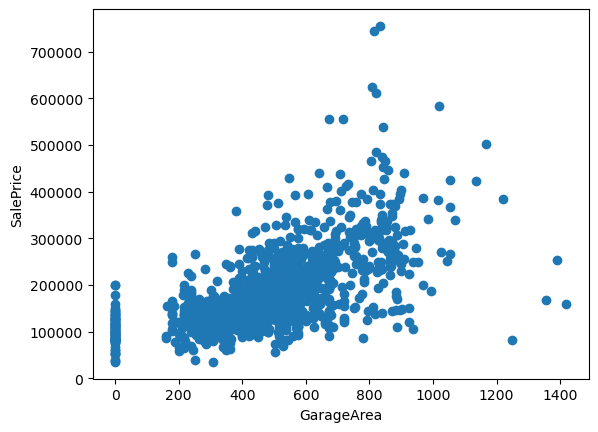

In [8]:
plt.scatter(x = df_train['GarageArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')

# Part 2. Data Preprocessing

In [9]:
# Finding out which columns have missing data and how much is missing compared to the other columns
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(50)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [10]:
# Many independent variables have missing values so we will be dropping variabes with at least 5% of its data missing
# We will be dropping 11 total variables (PoolQC, MiscFeature, Alley, Fence, FireplaceQu, LotFrontage,
# GarageYrBlt, GarageCond, GarageType, GarageFinish, GarageQual)

## We know from the variable correlation information that all the removed variables have low correlation to 'SalePrice'

train = df_train.drop((missing_data[missing_data['Percent'] > 0.05]).index,1)

C:\Users\19164\AppData\Local\Temp\ipykernel_18952\1262347465.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train = df_train.drop((missing_data[missing_data['Percent'] > 0.05]).index,1)


In [11]:
train.isnull().sum().sort_values(ascending=False).head(59)

BsmtFinType2     38
BsmtExposure     38
BsmtCond         37
BsmtFinType1     37
BsmtQual         37
MasVnrType        8
MasVnrArea        8
Electrical        1
GrLivArea         0
CentralAir        0
LowQualFinSF      0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
2ndFlrSF          0
1stFlrSF          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
Id                0
TotRmsAbvGrd      0
Functional        0
SaleCondition     0
SaleType          0
YrSold            0
MoSold            0
MiscVal           0
PoolArea          0
ScreenPorch       0
3SsnPorch         0
EnclosedPorch     0
OpenPorchSF       0
WoodDeckSF        0
PavedDrive        0
GarageArea        0
GarageCars        0
Fireplaces        0
KitchenQual       0
BsmtUnfSF         0
HeatingQC         0
OverallQual       0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0


In [12]:
# We want to make sure we do this same process with our test data
total_test = df_test.isnull().sum().sort_values(ascending=False)
percent_test = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data.head(50)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageQual,78,0.053461
GarageFinish,78,0.053461
GarageCond,78,0.053461


In [13]:
# We want to make sure we do this same process with our test data
test = df_test.drop((missing_data[missing_data['Percent'] > 0.05]).index,1)

C:\Users\19164\AppData\Local\Temp\ipykernel_18952\3075153040.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test = df_test.drop((missing_data[missing_data['Percent'] > 0.05]).index,1)


In [14]:
test.isnull().sum().sort_values(ascending=False).head(20)

BsmtCond        45
BsmtExposure    44
BsmtQual        44
BsmtFinType2    42
BsmtFinType1    42
MasVnrType      16
MasVnrArea      15
MSZoning         4
BsmtFullBath     2
BsmtHalfBath     2
Utilities        2
Functional       2
BsmtFinSF2       1
Exterior2nd      1
BsmtFinSF1       1
BsmtUnfSF        1
TotalBsmtSF      1
Exterior1st      1
KitchenQual      1
GarageCars       1
dtype: int64

In [15]:
train.isnull().sum().sort_values(ascending = False).head(20)

BsmtFinType2    38
BsmtExposure    38
BsmtCond        37
BsmtFinType1    37
BsmtQual        37
MasVnrType       8
MasVnrArea       8
Electrical       1
GrLivArea        0
CentralAir       0
LowQualFinSF     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
2ndFlrSF         0
1stFlrSF         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Id               0
dtype: int64

In [16]:
# Categorical boolean mask (Boolean Mask Vs pd.dummies)
categorical_feature_mask = train.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = train.columns[categorical_feature_mask].tolist()

In [17]:
categorical_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [18]:
# Categorical boolean mask
categorical_feature_mask_test = test.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols_test = test.columns[categorical_feature_mask_test].tolist()

In [19]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [20]:
test.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [21]:
test.isnull().sum().sort_values(ascending=False).head(20)

BsmtCond        45
BsmtExposure    44
BsmtQual        44
BsmtFinType2    42
BsmtFinType1    42
MasVnrType      16
MasVnrArea      15
MSZoning         4
BsmtFullBath     2
BsmtHalfBath     2
Utilities        2
Functional       2
BsmtFinSF2       1
Exterior2nd      1
BsmtFinSF1       1
BsmtUnfSF        1
TotalBsmtSF      1
Exterior1st      1
KitchenQual      1
GarageCars       1
dtype: int64

In [22]:
# MasVnrArea is one of our top correlations values so we dont want to drop it despite having missing values
# We will fill the null values with the mean of all the datapoints that are available

train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

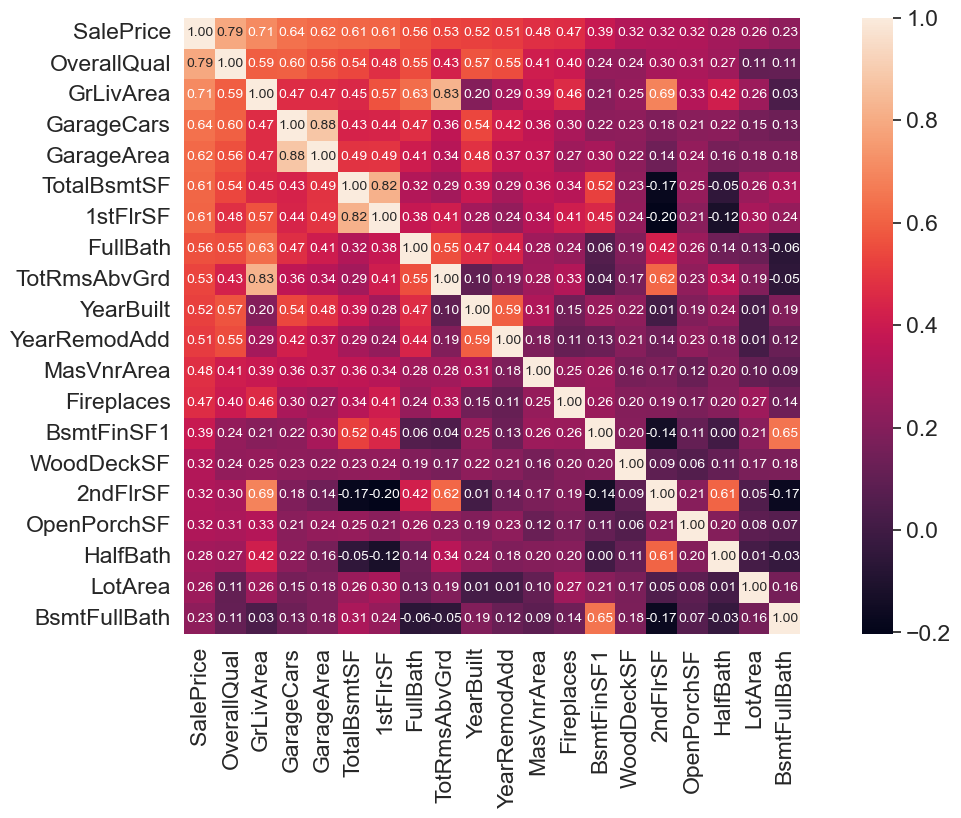

In [23]:
#saleprice correlation matrix
k = 20 #number of variables for heatmap
plt.figure(figsize=(16,8))
corrmat = train.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [24]:
train = train[cols]

In [25]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'WoodDeckSF',
       '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath'],
      dtype='object')

In [26]:
test=test[cols.drop('SalePrice')]

In [27]:
test.isnull().sum().sort_values(ascending=False).head(20)

MasVnrArea      15
BsmtFullBath     2
BsmtFinSF1       1
GarageCars       1
GarageArea       1
TotalBsmtSF      1
LotArea          0
HalfBath         0
OpenPorchSF      0
2ndFlrSF         0
WoodDeckSF       0
OverallQual      0
Fireplaces       0
GrLivArea        0
YearBuilt        0
TotRmsAbvGrd     0
FullBath         0
1stFlrSF         0
YearRemodAdd     0
dtype: int64

In [28]:
test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961,0.0,0,468.0,140,0,0,0,11622,0.0
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,108.0,0,923.0,393,0,36,1,14267,0.0
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,0.0,1,791.0,212,701,34,1,13830,0.0
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,20.0,1,602.0,360,678,36,1,9978,0.0
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,0.0,0,263.0,0,0,82,0,5005,0.0


In [29]:
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())

# Part 3 Model Training

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.3, random_state=101)

In [31]:
# we are going to scale to data

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [32]:
X_train

array([[ 1.37391375,  2.5236405 ,  0.31454703, ...,  1.2352801 ,
        -0.10107462, -0.82260217],
       [-1.53923947, -0.2856721 ,  0.31454703, ..., -0.75912158,
        -0.35052614, -0.82260217],
       [ 0.64562544, -0.01580724,  0.31454703, ..., -0.75912158,
        -0.10529568, -0.82260217],
       ...,
       [-0.08266286,  0.08903234,  0.31454703, ...,  1.2352801 ,
        -1.13891279,  1.10119513],
       [ 0.64562544,  0.03855402,  0.31454703, ..., -0.75912158,
         0.79569817,  1.10119513],
       [-0.81095116, -0.70308897, -1.02489906, ..., -0.75912158,
        -0.32451891,  1.10119513]])

In [33]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [34]:
lm.fit(X_train,y_train)
print(lm)

LinearRegression()


In [35]:
# print the intercept
print(lm.intercept_)

[1.11202911e-16]


In [36]:
print(lm.coef_)

[[ 0.30353101 -0.06527291  0.04687738  0.0591705   0.11594     0.28359642
  -0.05281374  0.03324074  0.085917    0.10151943  0.05934702  0.03257317
   0.13264478  0.01879664  0.3230989   0.01480528 -0.01378755  0.0601061
  -0.00458436]]


In [37]:
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

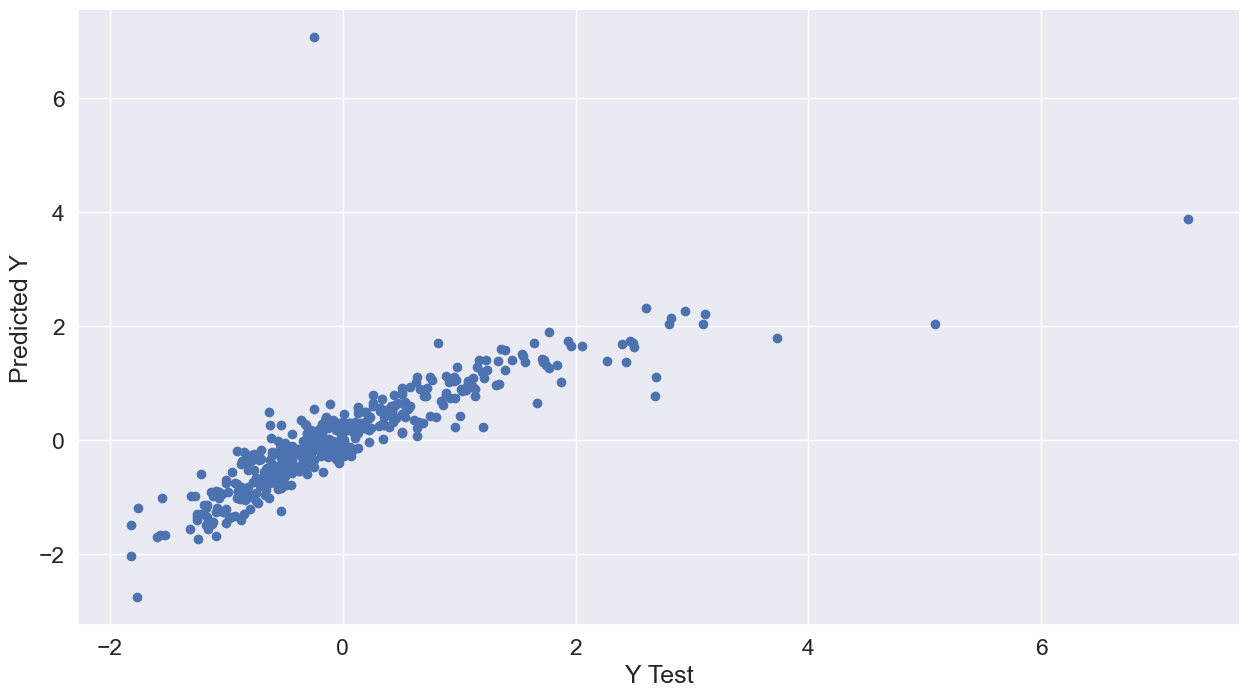

In [38]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

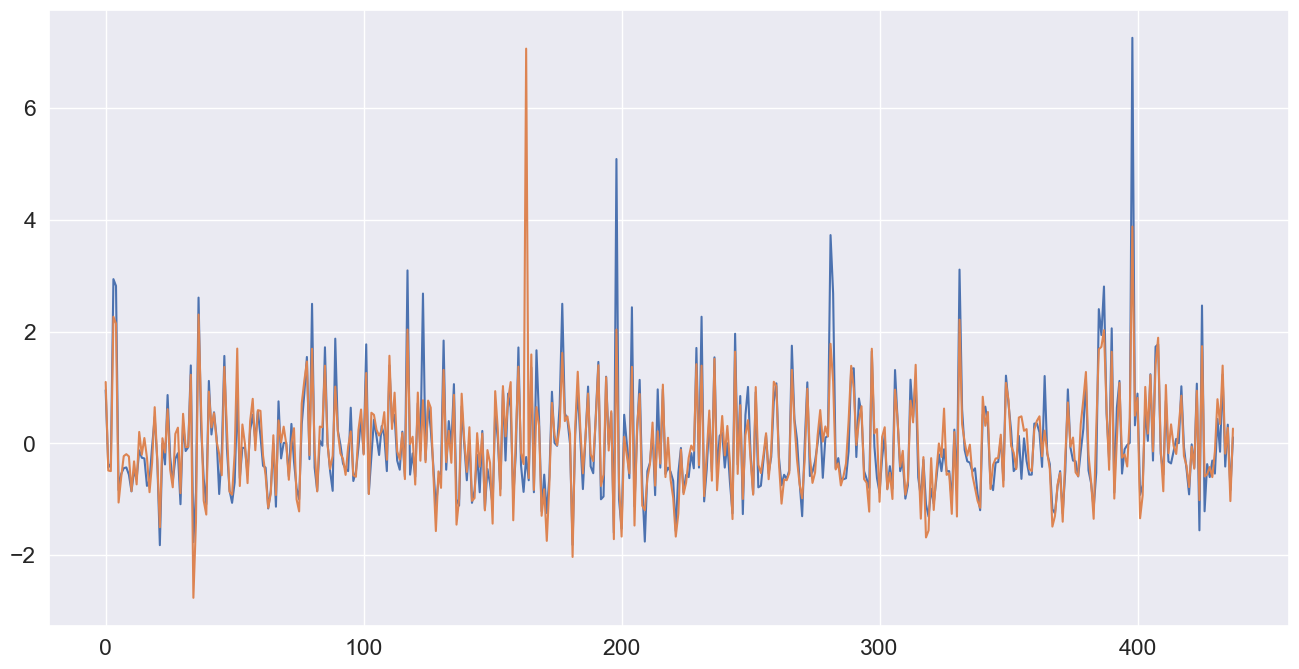

In [39]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(predictions, label = 'predict')
plt.show()

In [40]:
from sklearn import metrics

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.28451002346585064
MSE: 0.2937957765065367
RMSE: 0.5420293133277357


In [42]:
predictions

array([[ 1.09901643e+00],
       [-4.84859161e-01],
       [-4.95950056e-01],
       [ 2.26707099e+00],
       [ 2.14243885e+00],
       [-1.05779933e+00],
       [-6.11905742e-01],
       [-2.27285297e-01],
       [-1.92479942e-01],
       [-2.32722010e-01],
       [-8.52992127e-01],
       [-3.20889063e-01],
       [-7.32930404e-01],
       [ 2.05035056e-01],
       [-2.02660620e-01],
       [ 9.65192583e-02],
       [-2.54880378e-01],
       [-8.72811182e-01],
       [-3.42879103e-01],
       [ 6.48580266e-01],
       [-2.92374000e-01],
       [-1.49959052e+00],
       [ 9.26049492e-02],
       [-1.63245132e-01],
       [ 6.12497855e-01],
       [-4.71449156e-01],
       [-7.85023701e-01],
       [ 1.70608579e-01],
       [ 2.82261345e-01],
       [-8.89521068e-01],
       [ 5.29946701e-01],
       [-6.67439786e-02],
       [-6.14137749e-02],
       [ 1.22859812e+00],
       [-2.76232487e+00],
       [-1.40371464e+00],
       [ 2.30494185e+00],
       [ 5.91288014e-01],
       [-1.0

In [43]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.1, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [44]:
model_lgb.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\19164\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9, max_bin=55,
              min_data_in_leaf=6, min_sum_hessian_in_leaf=11, n_estimators=500,
              num_leaves=5, objective='regression')

In [45]:
lgb_pred = model_lgb.predict(X_test)
lgb_pred = lgb_pred.reshape(-1,1)

In [46]:
print('Mean absolute error (MAE):', metrics.mean_absolute_error(y_test, lgb_pred))
print('Mean squared error (MSE):', metrics.mean_squared_error(y_test, lgb_pred))
print('Root-mean-square deviation (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, lgb_pred)))

Mean absolute error (MAE): 0.23760659174787385
Mean squared error (MSE): 0.13843718200497745
Root-mean-square deviation (RMSE): 0.3720714743231164


In [47]:
a = pd.read_csv('C:/Users/19164/Desktop/Data Analytics/Test Model/test.csv')

In [48]:
test_id = a['Id']
a = pd.DataFrame(test_id, columns=['Id'])

In [49]:
test = sc_X.fit_transform(test)

In [50]:
test.shape

(1459, 19)

In [51]:
test_prediction_lgbm=model_lgb.predict(test)
test_prediction_lgbm= test_prediction_lgbm.reshape(-1,1)

In [52]:
test_prediction_lgbm

array([[-0.71514939],
       [-0.10583761],
       [ 0.02700955],
       ...,
       [ 0.02776062],
       [-0.63277135],
       [ 0.67726339]])

In [53]:
test_prediction_lgbm =sc_y.inverse_transform(test_prediction_lgbm)

In [54]:
test_prediction_lgbm = pd.DataFrame(test_prediction_lgbm, columns=['SalePrice'])

In [55]:
test_prediction_lgbm.head()

,SalePrice
0,122586.342053
1,170921.447319
2,181459.863820
3,191995.940554
4,173317.365940


In [56]:
result = pd.concat([a,test_prediction_lgbm], axis=1)

In [57]:
result.head()

,Id,SalePrice
0,1461,122586.342053
1,1462,170921.447319
2,1463,181459.863820
3,1464,191995.940554
4,1465,173317.365940


In [58]:
result.to_csv('Draft.csv',index=False)

# Part 4 - Generating CSV